(sec:reduced_densities)=
# Reduced particle densities

Consider an $N$-electron system in a state represented by a general state vector that can be expressed as a linear combination of Slater determinants

$$
| \Psi \rangle =
\sum_n c_n | \Phi_n \rangle
$$

The one- and two-particle particle reduced densities can be evaluated as expectation values of one- and two-particle operators, respectively, using the [expressions for matrix elements](sec:matrix-elements). The resulting formulas will be expressions involving products of molecular orbitals from which we can identify one- and two-particle density matrices.

As an illustration, we will determine the one- and two-particle densities along the internuclear axis of carbon monoxide at the level of Hartree--Fock theory.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

mol_str = """
C        0.00000000    0.00000000    0.00000000
O        0.00000000    0.00000000    2.70000000
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="au")
basis = vlx.MolecularBasis.read(molecule, "cc-pVDZ")

scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

* Info * Reading basis set from file: /home/thomas/Notebook/anaconda/envs/echem/lib/python3.10/site-packages/veloxchem/basis/CC-PVDZ
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
      

## One-particle density

### Probabilistic interpretation

The probability density of finding any one electron in an infinitesimal volume element at position $\mathbf{r}$ regardless of the positions of other electrons is equal to

$$
n(\mathbf{r}) = N
\int \cdots \int
\Psi^\dagger(\mathbf{r}, \mathbf{r}_2, \ldots, \mathbf{r}_N) 
\Psi(\mathbf{r}, \mathbf{r}_2, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_2 \cdots \mathrm{d}^3\mathbf{r}_N
$$

### Expectation values

For a scalar [one-electron operator](https://kthpanor.github.io/echem/docs/elec_struct/operators.html#one-electron-operators) in coordinate basis taking the form

$$
\hat{\Omega} = \sum_{i=1}^N \omega(\mathbf{r}_i)
$$

the expectation value relates to the one-particle density according to

\begin{align*}
\langle \hat{\Omega} \rangle & =
\int \cdots \int
\Psi^\dagger(\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N) 
\, \hat{\Omega} \,
\Psi(\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_1 \mathrm{d}^3 \mathbf{r}_2 \cdots \mathrm{d}^3\mathbf{r}_N
\\ & =
N \int \omega(\mathbf{r})
\Big[
\int \cdots \int 
\Psi^\dagger(\mathbf{r}, \mathbf{r}_2, \ldots, \mathbf{r}_N) 
\Psi(\mathbf{r}, \mathbf{r}_2, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_2 \cdots \mathrm{d}^3\mathbf{r}_N
\Big]
\mathrm{d}^3 \mathbf{r} 
\\ & =
\int \omega(\mathbf{r}) \, n(\mathbf{r}) \,
\mathrm{d}^3 \mathbf{r} 
\end{align*}

(sec:one_particle_density_operator)=
### One-particle density operator

The [one-particle density](sec:reduced_densities) can be written as an expectation of a one-electron operator according to

$$
n(\mathbf{r}) =
\langle \Psi | \hat{n}(\mathbf{r}) | \Psi \rangle
$$

with

$$
\hat{n}(\mathbf{r}) = 
\sum_{i=1}^N
\delta(\mathbf{r} - \mathbf{r}_i)
$$

Where $\delta(\mathbf{r} - \mathbf{r}_i)$ is the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function). After evaluation of this expectation value, the one-particle density matrix, $D$, is identified from the expression

$$
n(\mathbf{r}) \equiv
\sum_{p,q} \psi_p^\dagger(\mathbf{r}) D_{pq} \psi_q(\mathbf{r})
$$

For a state represented by a single Slater determinant, the one-electron density becomes

$$
n(\mathbf{r}) = \sum_{i=1}^N |\psi_i(\mathbf{r})|^2
$$

where the summation run over the $N$ occupied spin orbitals. Consequently, the density matrix is in this case equal to the identity matrix in the occupied–occupied block and zero elsewhere.

### Illustration

The one-particle density is available in VeloxChem by means of the `VisualizationDriver` class. As indicated by the string argument "alpha" in the `get_density` method, the $\alpha$- and $\beta$-spin densities can be determined individually, referring to the relation

$$
    n(\mathbf{r}) = n^\alpha(\mathbf{r}) + n^\beta(\mathbf{r})
$$

For a closed shell system, the two spin densities are equal and thus equal to half the total one-particle density.

Considering the one-particle density of CO, as calculated along the line intersecting both atoms:

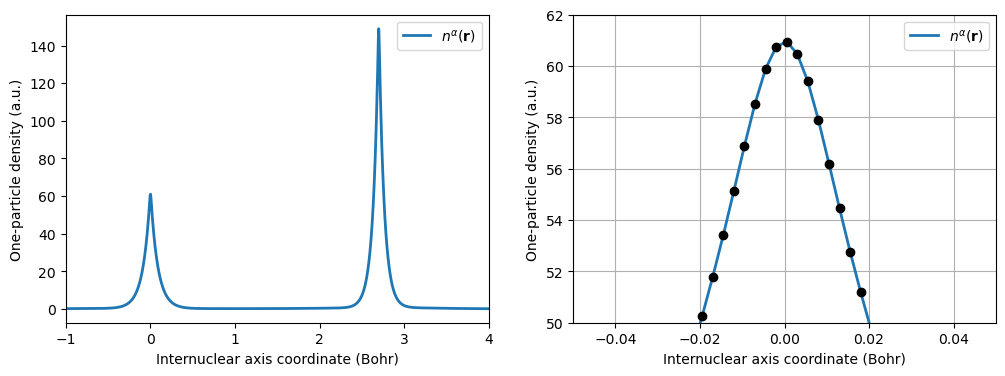

In [8]:
vis_drv = vlx.VisualizationDriver()

# list of coordinates in units of Bohr
n = 2000
coords = np.zeros((n, 3))
z = np.linspace(-1, 4, n)
coords[:, 2] = z
one_part_den = vis_drv.get_density(coords, molecule, basis, scf_drv.density, "alpha")

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(z, one_part_den, lw=2, label=r"$n^\alpha(\mathbf{r})$")
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"One-particle density (a.u.)")

plt.subplot(1, 2, 2)
plt.plot(z, one_part_den, lw=2, label=r"$n^\alpha(\mathbf{r})$")
plt.plot(z, one_part_den, "ko")
plt.grid(True)
plt.setp(plt.gca(), xlim=(-0.05, 0.05), ylim=(50, 62))
plt.legend()
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"One-particle density (a.u.)")

plt.show()

The right figure panel is an enlargement of the one-particle density in the region of the carbon nucleus, illustrating the fact that $n(\mathbf{r})$ displays a cusp at any given nuclear position.

## Two-particle density

### Probabilistic interpretation

The probability density of finding any two electrons in separate infinitesimal volume elements at positions $\mathbf{r}_1$ and $\mathbf{r}_2$ regardless of the positions of other electrons is equal to

$$
n(\mathbf{r}_1, \mathbf{r}_2) = N (N-1)
\int \cdots \int
\Psi^\dagger(\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3, \ldots, \mathbf{r}_N) 
\Psi(\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_3 \cdots \mathrm{d}^3\mathbf{r}_N
$$

### Expectation values

For a scalar [two-electron operator](https://kthpanor.github.io/echem/docs/elec_struct/operators.html#two-electron-operators) in coordinate basis taking the form

$$
\hat{\Omega} = \sum_{j>i}^N \omega(\mathbf{r}_i, \mathbf{r}_j)
$$

the expectation value relates to the one-particle density according to

\begin{align*}
\langle \hat{\Omega} \rangle & =
\int \cdots \int
\Psi^\dagger(\mathbf{r}_1, \ldots, \mathbf{r}_N) 
\, \hat{\Omega} \,
\Psi(\mathbf{r}_1, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_1 \cdots \mathrm{d}^3\mathbf{r}_N
\\ & =
\frac{N (N-1)}{2} \int \int \omega(\mathbf{r}_1, \mathbf{r}_2)
\Big[
\int \cdots \int 
\Psi^\dagger(\mathbf{r}_1, \ldots, \mathbf{r}_N) 
\Psi(\mathbf{r}_1, \ldots, \mathbf{r}_N) \,
\mathrm{d}^3 \mathbf{r}_3 \cdots \mathrm{d}^3\mathbf{r}_N
\Big]
\mathrm{d}^3 \mathbf{r}_1
\mathrm{d}^3 \mathbf{r}_2 
\\ & =
\frac{1}{2}
\int \omega(\mathbf{r}_1, \mathbf{r}_2) \, n(\mathbf{r}_1, \mathbf{r}_2) \,
\mathrm{d}^3 \mathbf{r}_1
\mathrm{d}^3 \mathbf{r}_2 
\end{align*}


(sec:two_particle_density_operator)=
### Two-particle density operator

The [two-particle density](sec:reduced_densities) can be written as an expectation of a two-electron operator according to

$$
n(\mathbf{r}, \mathbf{r}') =
\langle \Psi | \hat{n}(\mathbf{r}, \mathbf{r}') | \Psi \rangle
$$

with

$$
\hat{n}(\mathbf{r}, \mathbf{r}') = 
\sum_{i=1}^N \sum_{j>i}^N \left[
\delta(\mathbf{r} - \mathbf{r}_i) \delta(\mathbf{r}' - \mathbf{r}_j)
+
\delta(\mathbf{r} - \mathbf{r}_j) \delta(\mathbf{r}' - \mathbf{r}_i)
\right]
$$

After evaluation of this expectation value, the two-particle density matrix, $D$, is identified from the expression

$$
n(\mathbf{r}, \mathbf{r}') \equiv
\sum_{p, q, r, s} \psi_p^\dagger(\mathbf{r}) \psi_q(\mathbf{r}) D_{pqrs}  \psi_r^\dagger(\mathbf{r}') \psi_s(\mathbf{r}')
$$

For a state represented by a single Slater determinant, the two-electron density becomes

$$
n(\mathbf{r}, \mathbf{r}')
= \sum_{i=1}^N
\sum_{j=1}^N 
\left[\rule{0pt}{12pt}
|\psi_i(\mathbf{r})|^2
|\psi_j(\mathbf{r}')|^2
-
\psi_i^\dagger(\mathbf{r})
\psi_j^\dagger(\mathbf{r}')
\psi_j(\mathbf{r})
\psi_i(\mathbf{r}')
\right]
$$

where the summations run over the $N$ occupied spin orbitals.

### Illustration

As indicated by the string arguments "alpha" and "beta" in the `get_two_particle_density` method, the spin densities can be determined individually, referring to the relation

$$
    n(\mathbf{r}_1, \mathbf{r}_2) = n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2) + 
    n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2) + n^{\beta\alpha}(\mathbf{r}_1, \mathbf{r}_2) + 
    n^{\beta\beta}(\mathbf{r}_1, \mathbf{r}_2)
$$

For a closed shell system, we have

\begin{align*}
n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2) & = n^{\beta\beta}(\mathbf{r}_1, \mathbf{r}_2) \\
n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2) & = n^{\beta\alpha}(\mathbf{r}_1, \mathbf{r}_2) 
\end{align*}

We will determine the two-particle density for electron 1 being positioned at the carbon nucleus and electron 2 being positioned along the internuclear axis.

In [4]:
n = 100
origin = np.zeros((n, 3))
coords = np.zeros((n, 3))
z = np.linspace(-1, 4, n)
coords[:, 2] = z

two_part_den_aa = vis_drv.get_two_particle_density(
    origin, coords, molecule, basis, scf_drv.density, "alpha", "alpha"
)
two_part_den_ab = vis_drv.get_two_particle_density(
    origin, coords, molecule, basis, scf_drv.density, "alpha", "beta"
)

NameError: name 'two_part_den_aa' is not defined

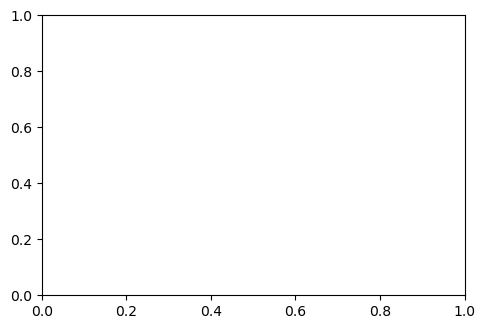

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(
    z, two_part_den_aa, lw=2, label=r"$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.figtext(0.2, 0.75, r"Same spin electrons")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.subplot(2, 2, 3)
plt.plot(
    z, two_part_den_aa, lw=2, label=r"$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.plot(
    z, two_part_den_ab, lw=2, label=r"$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 2), ylim=(0, 20))
plt.legend()
plt.figtext(0.22, 0.25, r"Same spin")
plt.figtext(0.15, 0.15, r"Fermi hole")
plt.figtext(0.32, 0.4, r"Opposite spin ")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.subplot(2, 2, 2)
plt.plot(
    z, two_part_den_ab, lw=2, label=r"$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.figtext(0.63, 0.75, r"Opposite spin electrons")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.show()